<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/Image_Restoration__Super_Resolution__Real_ESRGAN_and_GFPGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-ESRGAN Inference Models

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

🎉 Original Repository: https://github.com/xinntao/Real-ESRGAN


🚀 Online inference: https://replicate.com/xinntao/realesrgan

🔥 More Colabs: https://github.com/R3gm/Colab-resources/



This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn).

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment.

In [ ]:
#@title Setup
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip -q install basicsr
!pip -q install facexlib
!pip -q install gfpgan
!pip -q install -r requirements.txt
!python setup.py develop

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 5.37 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (410/410), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.1 MB/s eta 0:00:00
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setu

# 2. Upload Images



In [ ]:
#@title Upload the images to be processed by Real-ESRGAN
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving children-alpha.png to children-alpha.png
Saving ADE_val_00000114.jpg to ADE_val_00000114.jpg
Saving 0030.jpg to 0030.jpg
move children-alpha.png to upload/children-alpha.png
move ADE_val_00000114.jpg to upload/ADE_val_00000114.jpg
move 0030.jpg to upload/0030.jpg


# 3. Inference


In [ ]:
import argparse
from google.colab import files

#@markdown # Run inference
MODEL = "RealESRGAN_x4plus" #@param ["RealESRGAN_x4plus", "RealESRGAN_x4pl", "RealESRGAN_x2plus", "RealESRGAN_x2plus_anime_6B", "RealESRGAN_x4plus", "RealESRGAN_x4plus_anime_6B", "RealESRGAN_x4plus_general-x4v3", "realesr-animevideov3", "realesr-general-x4v3"]

Scale_of_the_image_x = 3.5 #@param {type:"slider", min:1, max:8, step:0.5}
Face_enhance_GFPGAN = True #@param {type:"boolean"}
Low_RAM_use = True #@param {type:"boolean"}

Face_enhance_GFPGAN = '--face_enhance' if Face_enhance_GFPGAN else ''
Low_RAM_use = '--tile 100' if Low_RAM_use else ''

#@markdown * "Scale_of_the_image_x" multiplies the resolution of the image by the paramete 
#@markdown * "Low_RAM_use" does not affect the quality of the result, it prevents memory issues in high-demand routines

# Run the command with the provided parameters
!python inference_realesrgan.py -n {MODEL} -i upload --outscale {Scale_of_the_image_x} {Face_enhance_GFPGAN} {Low_RAM_use}
# Arguments
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

# 4. Visualization

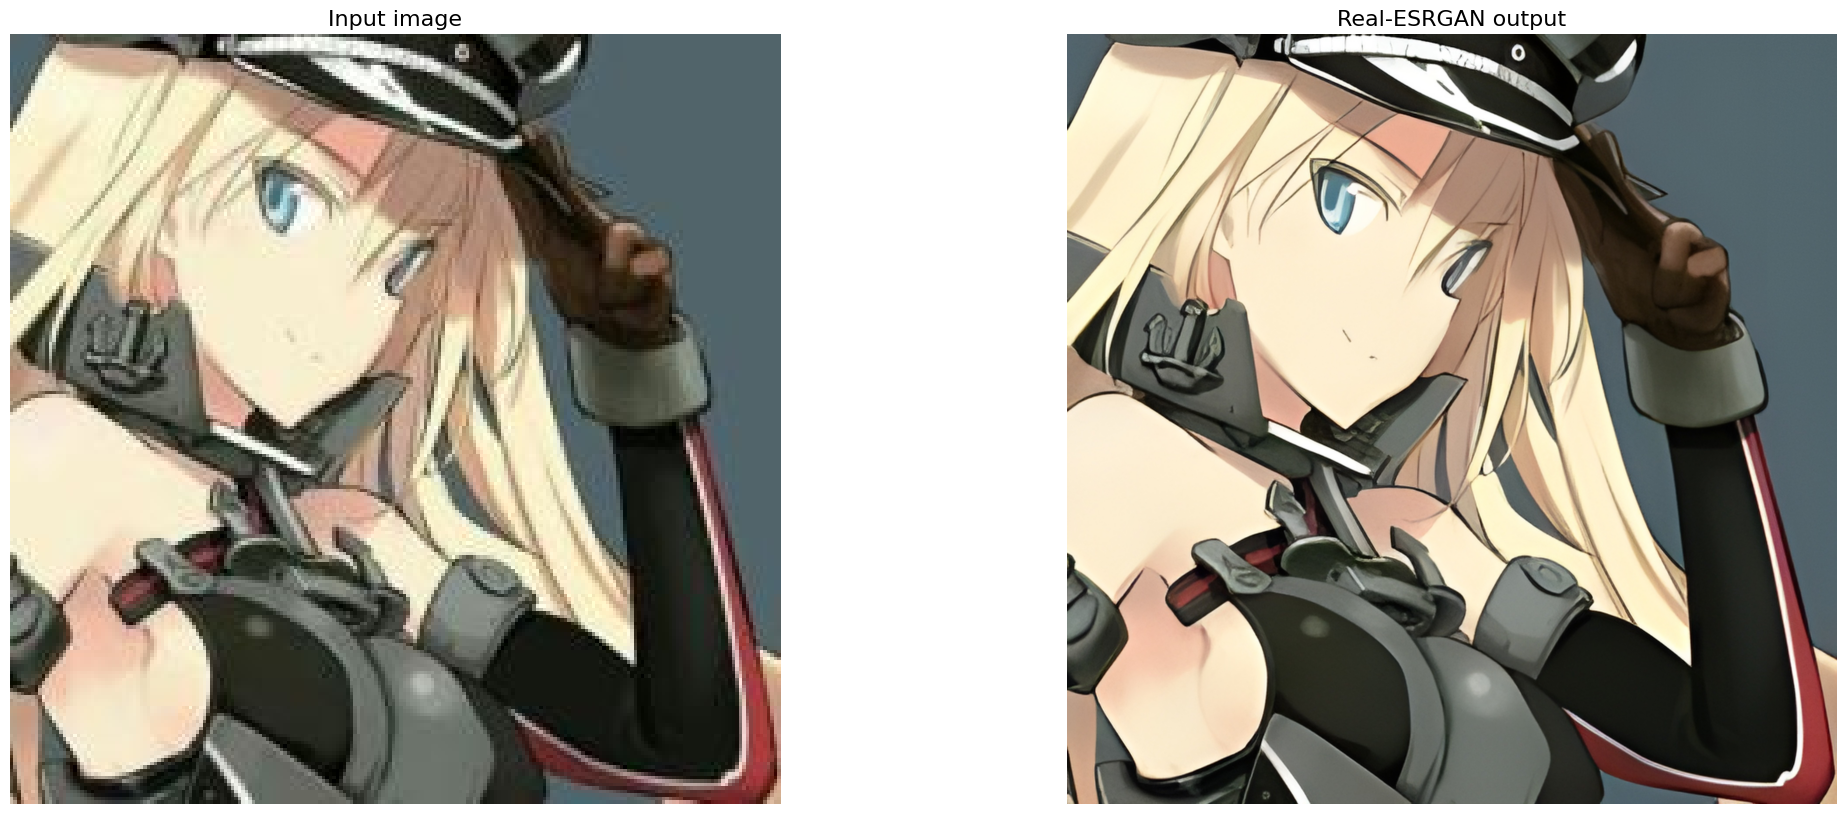

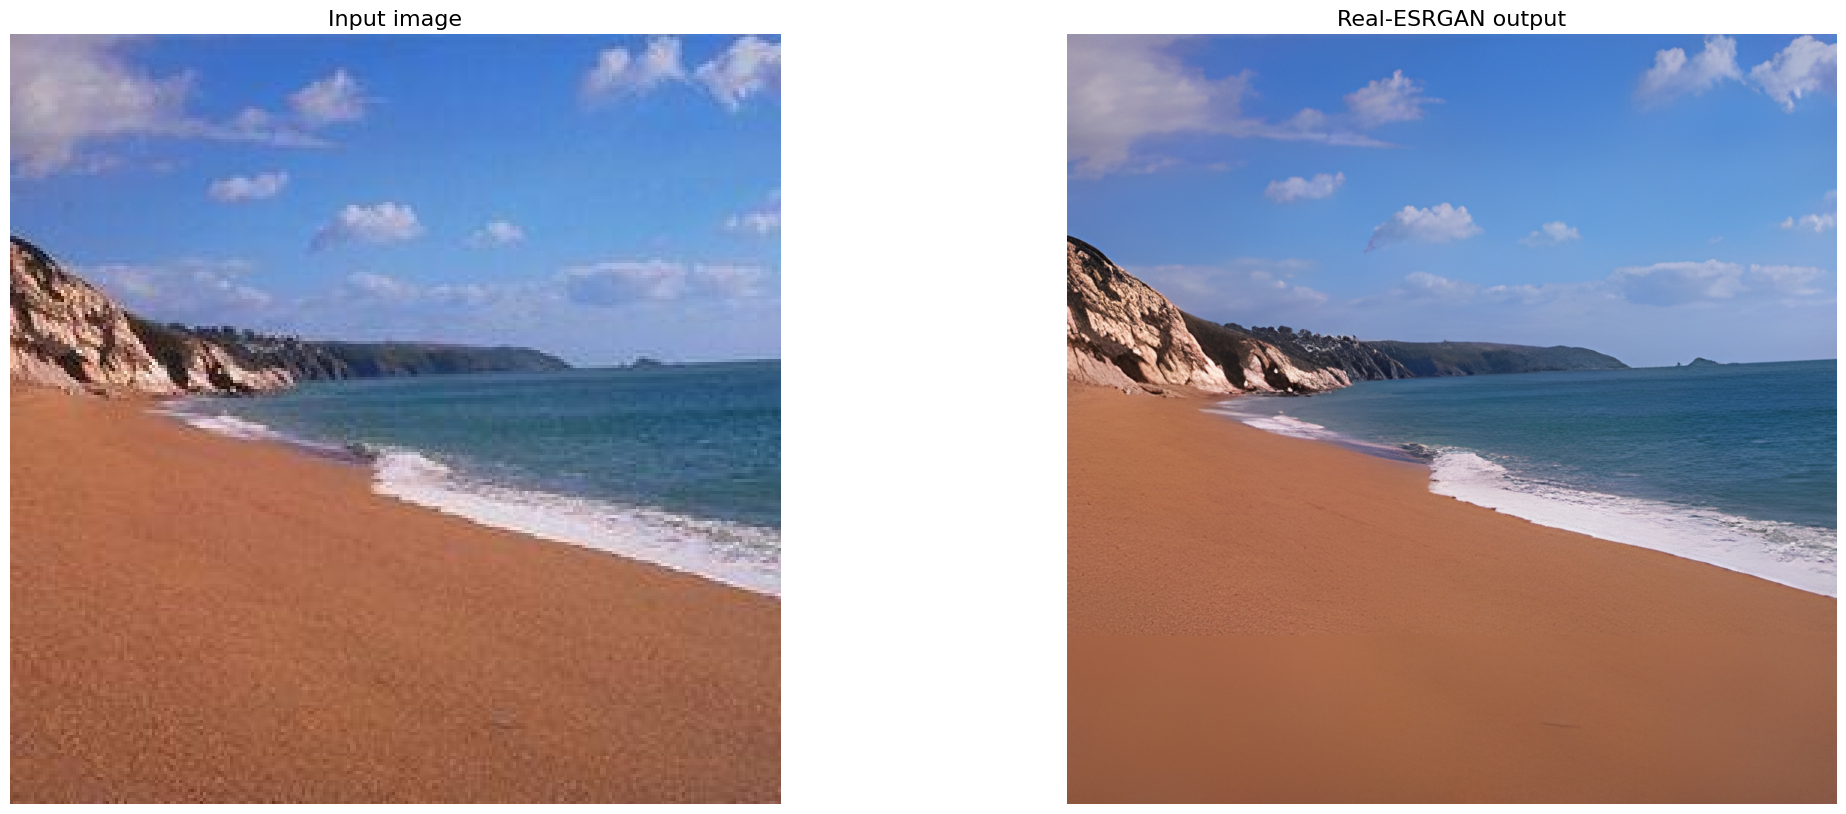

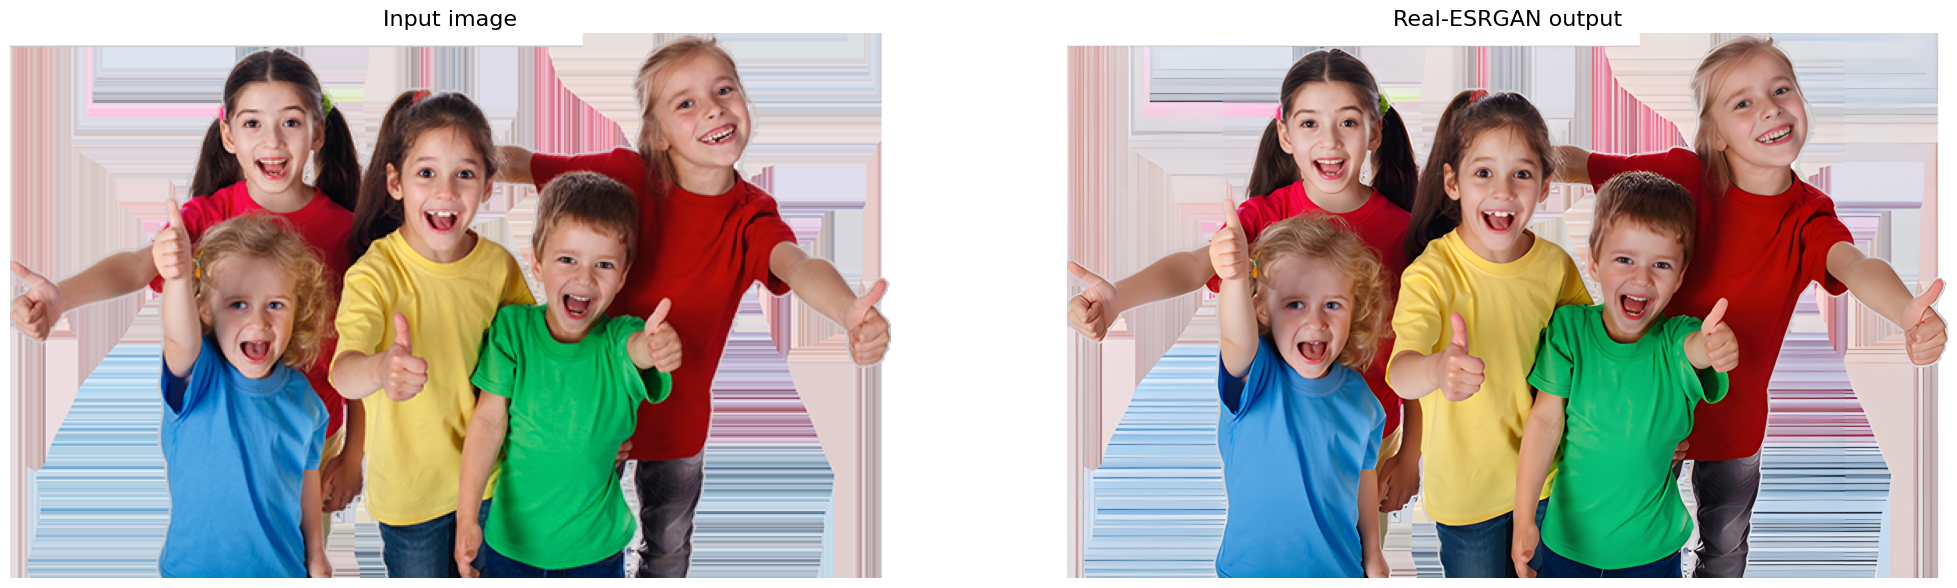

In [ ]:
#@title utils for visualization
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [ ]:
#@title Download the results
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### References

* https://github.com/ai-forever/Real-ESRGAN
* https://github.com/xinntao/Real-ESRGAN/releases/